# Inspecting your data

Podemos inspeccionar las primeras observaciones de nuestro DataFrame haciendo uso de los métodos **head(n)** para ver las n primeras observaciones de nuestro conjunto de datos y **tail(n)** para ver las n últimas observaciones de nuestro conjunto de datos.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Cargamos los datos
df = pd.read_csv('world_ind_pop_data.csv')

#Vemos las 5 primeras observaciones
print(df.head(5))

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  


In [6]:
#Vemos las 5 últimas observaciones
print(df.tail(5))

                 CountryName CountryCode  Year  Total Population  \
13369  Virgin Islands (U.S.)         VIR  2014          104170.0   
13370     West Bank and Gaza         WBG  2014         4294682.0   
13371            Yemen, Rep.         YEM  2014        26183676.0   
13372                 Zambia         ZMB  2014        15721343.0   
13373               Zimbabwe         ZWE  2014        15245855.0   

       Urban population (% of total)  
13369                         95.203  
13370                         75.026  
13371                         34.027  
13372                         40.472  
13373                         32.501  


# DataFrame data types

EL método **info()** nos permite obtener un descriptivo con información bastante util de nuestro conjunto de datos:

* Número de filas

* Número de columnas 

* Número de elementos que no son valores perdidos para cada columna

* Tipo de dato de cada una de las columnas

* Tipo de indexado 

In [4]:
#Aplicamos el método info a nuestro conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB
None


# NumPy and pandas working together

Pandas se trata de una librería que está construida sobre Numpy. Podemos hacer uso del atributo **values** para representar nuestro DataFrame como un Numpy Array. Esto nos permite poder hacer uso de métodos propios de las Numpy Array.

In [9]:
#Obtenemos los valores de nuestro DataFrame como un Numpy Array
np_vals = df['Total Population'].values

#Creamos un nuevo array que sera el logaritmo del array np_vals
np_vals_log_10 = np.log10(np_vals)

# Zip lists to build a DataFrame

Podemos construir un DataFrame a partir de listas.

In [13]:
#Nos creamos nuestras listas
list_keys = ['Country', 'Medals']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

#Hacemos uso de la función zip para crearnos una lista de tuplas asociada
zipped = zip(list_keys, list_values)

#Hacemos uso de la función dic para crearnos un diccionario
data = dict(zipped)

#Nos creamos nuestro DataFrame
df = pd.DataFrame(data)
print(df)

          Country  Medals
0   United States    1118
1    Soviet Union     473
2  United Kingdom     273


# Labeling your data

Podemos cambiar los nombres de las columnas de nuestro DataFrame haciendo uso del atributo **columns** e igualando este a una nueva con el nuevo nombre de las columnas.

In [14]:
#Renombramos las columnas
df.columns = ['Pais', 'Medallas']

#Vemos el resultado 
print(df)

             Pais  Medallas
0   United States      1118
1    Soviet Union       473
2  United Kingdom       273


# Building DataFrames with broadcasting

Podemos hacer uso de la técnica de Broadcasting a la hora de generar DataFrames.

In [3]:
#Nos creamos una lista de ciudades que pertenecen al estado de Pensilvania en USA
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs',
          'Cassville','Hannastown','Saltsburg','Tunkhannock','Pittsburgh','Lemasters','Great bend']

state = 'PA'

#Nos creamos nuestra DataFrame
df = pd.DataFrame({'cities': cities, 'state': state})

#Mostramos el resultado 
print(df)

             cities state
0           Manheim    PA
1      Preston park    PA
2       Biglerville    PA
3           Indiana    PA
4      Curwensville    PA
5             Crown    PA
6      Harveys lake    PA
7   Mineral springs    PA
8         Cassville    PA
9        Hannastown    PA
10        Saltsburg    PA
11      Tunkhannock    PA
12       Pittsburgh    PA
13        Lemasters    PA
14       Great bend    PA


# Reading a flat file

A continuación vamos a proceder a realizar la lectura del conjunto de datos **world_population.csv**. Para esto vamos a proceder a hacer uso de la función **read_csv()**. Tras esto volveremos a cargar los datos indicando que la primera fila es la cabezera mediante el argumento **header** y renombraremos los nombres de las columnas mediante el argumento **names**.

In [5]:
#Cargamos el conjunto de datos
df = pd.read_csv('world_population.csv')
print(df)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09


In [6]:
#Volvemos hacer la carga con los cambios indicados 
df2 = pd.read_csv('world_population.csv', header = 0, names = ['year', 'population'])
print(df2)

   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


# Delimiters, headers, and extensions

No todos los ficheros con los que trabajemos estarán limpios. Pandas en su modo lectura dispone de una serie de argumentos que nos permite limpiar nuestros datos.

In [7]:
#Cargamos los datos
df = pd.read_csv('messy_stock_data.tsv')
df.head()

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN


Podemos ver que este fichero no es cargado de forma adecuada. Este fichero dispone de múltiples líneas de cabecera, los valores están serparados por espacios en blanco en lugar de comas, y existen comentarios en las filas. El parámetro comment elimina aquella que se encuentre detrás del valor indicado en comment.

In [8]:
#Hacemos la carga correcta
df = pd.read_csv('messy_stock_data.tsv', sep = ' ', comment = '#', header = 3)
df.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [10]:
#Salvamos nuestro DataFrame limpio a tipo csv
df.to_csv('clean_stock_data.csv', index = False)

In [11]:
#Salvamos nuestro DataFrame limpio a tipo excel 
df.to_excel('clean_stock_data.xlsx', index=False)

# Plotting series using pandas

La visualización de los datos suele ser el primer paso para lograr realizar un mejor análisis de nuestros datos. 

In [25]:
#Cargamos los datos
df = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col = 'Date')
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


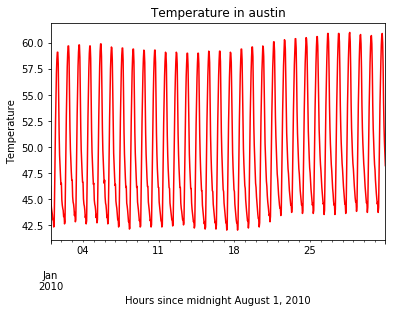

In [26]:
#Fijamos el color a rojo 
df['Temperature'].iloc[0:744].plot(color = 'red')

#Fijamos el título
plt.title('Temperature in austin')

#Fijamos los nombres de los ejes x e y 
plt.xlabel('Hours since midnight August 1, 2010')
plt.ylabel('Temperature')

#Mostramos el grafo
plt.show()

# Plotting DataFrames

Pandas nos permite mostrar mútiples columnas, de forma que podemos comparar, esto puede ser muy conveniente en determinadas situaciones.

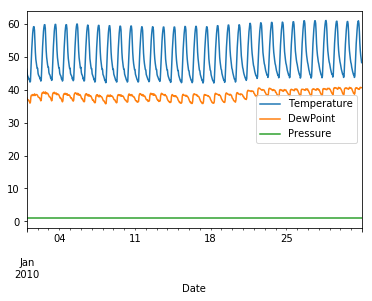

In [29]:
#Mostramos nuestro dataframe
df.iloc[0:744].plot()
plt.show()

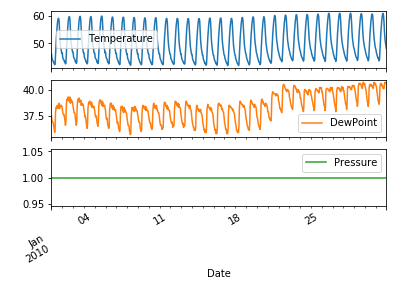

In [30]:
#Mostramos las columnas en diferentes plots
df.iloc[0:744].plot(subplots = True)
plt.show()

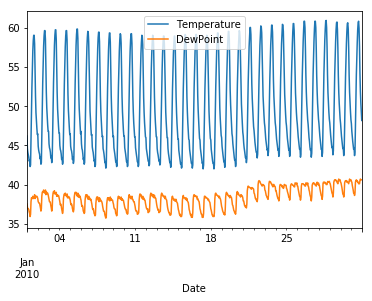

In [32]:
#Mostramos solo las dos primeras columnas
columns = ['Temperature', 'DewPoint']
df[columns].iloc[0:744].plot()
plt.show()